# Solemne 1 ~ Mineria de Datos ~ Luis Gonzalez

Durante este trabajo, usaremos python, pandas y google cloud para obtener BigQuerys además de librerías de manipulación 
de datos y gráficos.

Durante la selección de los datos, se consideró usar la bigquery "covid19_vaccination_search_insights” ya que resulto interesante comparar los datos de vacunaciones de diferentes lugares y hallar tendencias, correlaciones o diferencias en periodos temporales similares


# Importacion de Librerias ,  Google y cliente

In [2]:
#Primero que todo, llamamos las 3 librerias mas importantes a usar
import matplotlib.pyplot as plt 
from google.cloud import bigquery
import pandas as pd

In [3]:
client = bigquery.Client() #Para luego, acceder a cliente de bigQuery 

C:\Users\LUIS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\google\auth\_default.py:76: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


In [4]:
#Cargamos el dataset correspondiente
dataset_ref = client.dataset("covid19_vaccination_search_insights" , project = "bigquery-public-data")

In [5]:
dataset_ref

DatasetReference('bigquery-public-data', 'covid19_vaccination_search_insights')

In [6]:
dataset = client.get_dataset(dataset_ref)

In [7]:
#Lo agregaos como tablas
tables = list(client.list_tables(dataset))

In [8]:
for table in tables:
  print(table.table_id)

covid19_vaccination_search_insights


In [9]:

#Para finalmente cargar la tabla correspondiente y proceder a su visualizacion
tablref = dataset_ref.table("covid19_vaccination_search_insights")
table = client.get_table(tablref)

# Visualizacion Preeliminar de los Datos

In [10]:
#Observamos los primeros 10 Datos
client.list_rows(table, max_results=10).to_dataframe()

,date,country_region,country_region_code,sub_region_1,sub_region_1_code,sub_region_2,sub_region_2_code,sub_region_3,sub_region_3_code,place_id,sni_covid19_vaccination,sni_vaccination_intent,sni_safety_side_effects
0,2021-09-13,United Kingdom,GB,England,GB-ENG,Reigate and Banstead District,None,postal_code,RH1,ChIJ-0EcWdLkdUgRZ1PS4oL4kFo,35.673,8.976,5.164
1,2022-11-07,United Kingdom,GB,England,GB-ENG,Reigate and Banstead District,None,postal_code,RH1,ChIJ-0EcWdLkdUgRZ1PS4oL4kFo,11.069,4.072,1.413
2,2022-05-23,United Kingdom,GB,England,GB-ENG,Reigate and Banstead District,None,postal_code,RH1,ChIJ-0EcWdLkdUgRZ1PS4oL4kFo,16.906,5.060,1.213
3,2021-05-10,United Kingdom,GB,England,GB-ENG,Reigate and Banstead District,None,postal_code,RH1,ChIJ-0EcWdLkdUgRZ1PS4oL4kFo,78.803,21.293,20.039
4,2022-12-19,United Kingdom,GB,England,GB-ENG,Reigate and Banstead District,None,postal_code,RH1,ChIJ-0EcWdLkdUgRZ1PS4oL4kFo,7.772,2.544,0.798
5,2021-08-02,United Kingdom,GB,England,GB-ENG,Reigate and Banstead District,None,postal_code,RH1,ChIJ-0EcWdLkdUgRZ1PS4oL4kFo,69.342,27.578,7.794
6,2021-03-15,United Kingdom,GB,England,GB-ENG,Reigate and Banstead District,None,postal_code,RH1,ChIJ-0EcWdLkdUgRZ1PS4oL4kFo,77.010,15.247,16.096
7,2023-01-02,United Kingdom,GB,England,GB-ENG,Reigate and Banstead District,None,postal_code,RH1,ChIJ-0EcWdLkdUgRZ1PS4oL4kFo,9.723,2.867,1.111
8,2021-08-09,United Kingdom,GB,England,GB-ENG,Reigate and Banstead District,None,postal_code,RH1,ChIJ-0EcWdLkdUgRZ1PS4oL4kFo,52.459,13.214,7.926
9,2021-12-06,United Kingdom,GB,England,GB-ENG,Reigate and Banstead District,None,postal_code,RH1,ChIJ-0EcWdLkdUgRZ1PS4oL4kFo,127.497,35.172,5.321


In [11]:
#Observamos los datos entre 100 y 111
client.list_rows(table, max_results=3000).to_dataframe().iloc[100:111]

,date,country_region,country_region_code,sub_region_1,sub_region_1_code,sub_region_2,sub_region_2_code,sub_region_3,sub_region_3_code,place_id,sni_covid19_vaccination,sni_vaccination_intent,sni_safety_side_effects
100,2021-05-24,United Kingdom,GB,England,GB-ENG,Reigate and Banstead District,None,postal_code,RH1,ChIJ-0EcWdLkdUgRZ1PS4oL4kFo,62.944,15.111,13.284
101,2022-05-02,United Kingdom,GB,England,GB-ENG,Reigate and Banstead District,None,postal_code,RH1,ChIJ-0EcWdLkdUgRZ1PS4oL4kFo,19.592,5.689,1.527
102,2023-10-23,United Kingdom,GB,England,GB-ENG,Reigate and Banstead District,None,postal_code,RH1,ChIJ-0EcWdLkdUgRZ1PS4oL4kFo,6.842,1.439,1.247
103,2022-08-29,United Kingdom,GB,England,GB-ENG,Reigate and Banstead District,None,postal_code,RH1,ChIJ-0EcWdLkdUgRZ1PS4oL4kFo,11.969,3.685,0.685
104,2021-04-19,United Kingdom,GB,England,GB-ENG,Reigate and Banstead District,None,postal_code,RH1,ChIJ-0EcWdLkdUgRZ1PS4oL4kFo,46.181,12.348,11.277
105,2022-08-01,United Kingdom,GB,England,GB-ENG,Reigate and Banstead District,None,postal_code,RH1,ChIJ-0EcWdLkdUgRZ1PS4oL4kFo,10.810,2.911,0.823
106,2021-10-04,United Kingdom,GB,England,GB-ENG,Reigate and Banstead District,None,postal_code,RH1,ChIJ-0EcWdLkdUgRZ1PS4oL4kFo,33.886,8.070,3.479
107,2022-10-17,United Kingdom,GB,England,GB-ENG,Reigate and Banstead District,None,postal_code,RH1,ChIJ-0EcWdLkdUgRZ1PS4oL4kFo,19.432,7.387,2.467
108,2022-10-24,United Kingdom,GB,England,GB-ENG,Reigate and Banstead District,None,postal_code,RH1,ChIJ-0EcWdLkdUgRZ1PS4oL4kFo,16.020,5.887,2.165
109,2022-05-30,United Kingdom,GB,England,GB-ENG,Reigate and Banstead District,None,postal_code,RH1,ChIJ-0EcWdLkdUgRZ1PS4oL4kFo,14.011,4.398,0.693


# Uso de Sql para trabajar con DataFrames

In [22]:
#Usamos sql para pasar nuestros datos a un dataframe de pandas, en donde nos dimos cuenta que el trabajo 
#consistira en comparar regiones de Australia
query = """
SELECT date,sub_region_1 ,sni_covid19_vaccination
FROM `bigquery-public-data.covid19_vaccination_search_insights.covid19_vaccination_search_insights`
WHERE sub_region_1 = 'Western Australia'
LIMIT 50
"""

query_job = client.query(query)


dfWA = query_job.to_dataframe()

dfWA

,date,sub_region_1,sni_covid19_vaccination
0,2022-05-16,Western Australia,19.010
1,2021-09-20,Western Australia,53.126
2,2022-07-11,Western Australia,27.658
3,2022-04-04,Western Australia,34.173
4,2021-07-26,Western Australia,47.427
5,2022-03-07,Western Australia,46.850
6,2021-10-04,Western Australia,79.291
7,2021-12-27,Western Australia,94.092
8,2021-10-11,Western Australia,78.096
9,2022-05-23,Western Australia,20.230


In [23]:
#Ordenamos el dataframe, por orden de fecha
dfWAO = dfWA.sort_values(by='date', ascending=True)



In [21]:
dfWAO

,date,sub_region_1,sni_covid19_vaccination
44,2021-03-29,Western Australia,29.470
49,2021-04-19,Western Australia,30.315
22,2021-04-26,Western Australia,34.383
45,2021-05-24,Western Australia,40.409
15,2021-05-31,Western Australia,29.903
18,2021-06-07,Western Australia,45.051
36,2021-06-14,Western Australia,30.126
12,2021-06-21,Western Australia,37.226
46,2021-06-28,Western Australia,78.288
8,2021-07-05,Western Australia,42.568


In [68]:
#Ahora saco la cantidad total de vacunas sumando cada fila, en Western Australia

query = """
SELECT date, 
       SUM(sni_covid19_vaccination) AS VactotWA 
FROM `bigquery-public-data.covid19_vaccination_search_insights.covid19_vaccination_search_insights` 
WHERE sub_region_1 = 'Western Australia' 
GROUP BY date 

"""

query_job = client.query(query)

result = query_job.result()

VacsWA = list(result)[0].VactotWA 

print(VacsWA)

7900.812000000005


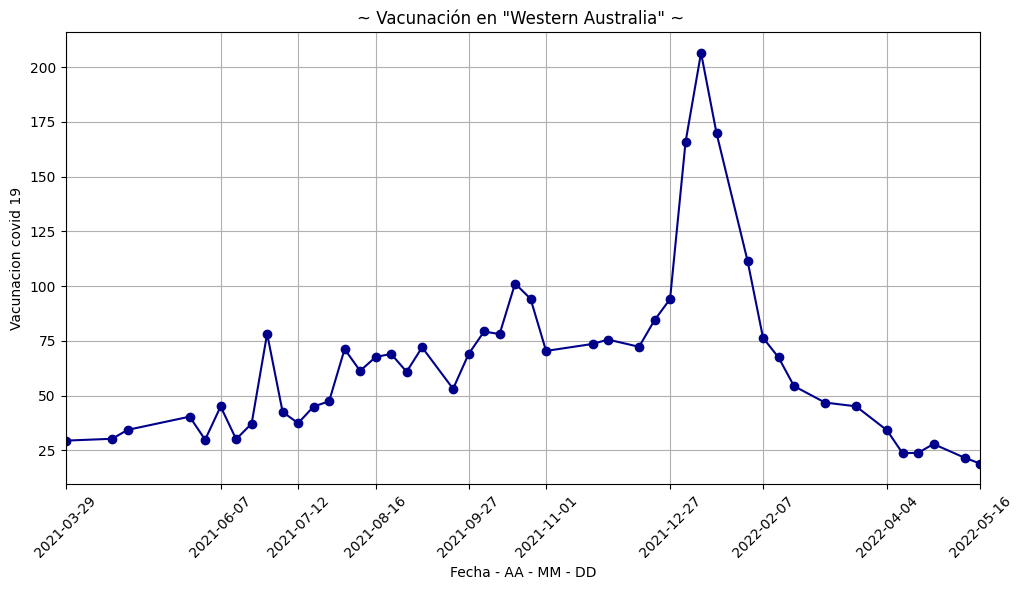

In [28]:
#Graficamos los datos con MatplotLib

from datetime import datetime #Libreria para trabajar con las fechas
 
limite_fecha = datetime.strptime('2022-05-16', '%Y-%m-%d') #Definimos un limite
plt.figure(figsize=(10, 6))
plt.plot(dfWAO['date'], dfWAO['sni_covid19_vaccination'] , marker='o', linestyle='-' , color = 'darkblue')
plt.title('~ Vacunación en "Western Australia" ~ ')
plt.xlabel('Fecha - AA - MM - DD')
plt.ylabel('Vacunacion covid 19')
plt.xticks(dfWAO['date'][::5], rotation=45)
plt.grid(True)
plt.tight_layout()
plt.xlim(dfWAO['date'].min(), limite_fecha)
plt.show()

# Vamos para las siguientes Regiones de Australia : South Australia

In [29]:
#Realizamos lo mismo para Las siguientes zonas de Australia
query = """
SELECT date,sub_region_1 ,sni_covid19_vaccination
FROM `bigquery-public-data.covid19_vaccination_search_insights.covid19_vaccination_search_insights`
WHERE sub_region_1 = 'South Australia'
LIMIT 50
"""

query_job = client.query(query)


dfSA = query_job.to_dataframe()



In [30]:
dfSAO = dfSA.sort_values(by='date', ascending=True)

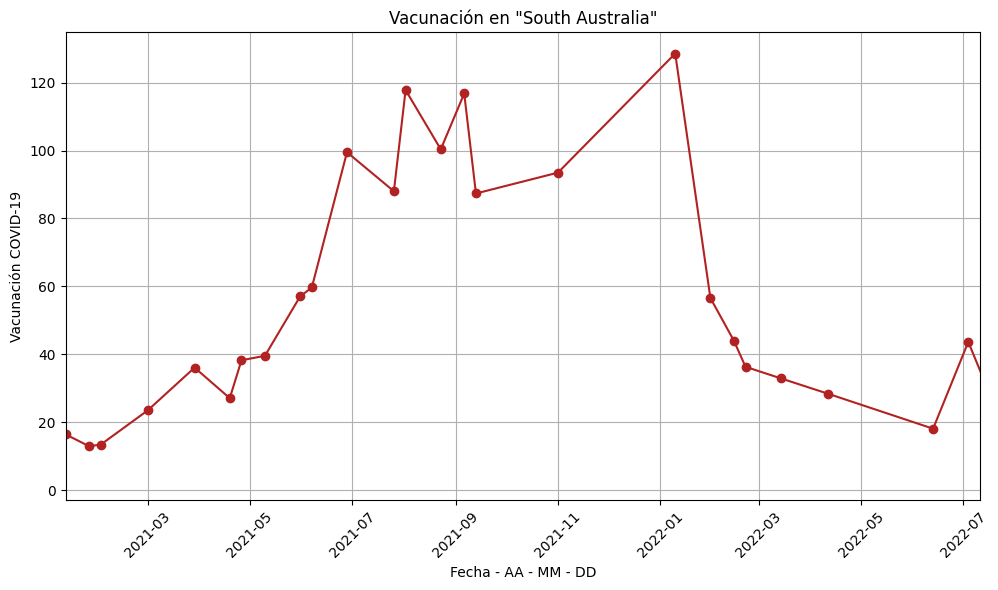

In [31]:


limite_fecha = datetime.strptime('2022-07-11', '%Y-%m-%d')

plt.figure(figsize=(10, 6))
plt.plot(dfSAO['date'], dfSAO['sni_covid19_vaccination'], marker='o', linestyle='-', color='firebrick')
plt.title('Vacunación en "South Australia"')
plt.xlabel('Fecha - AA - MM - DD')
plt.ylabel('Vacunación COVID-19')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()


plt.xlim(dfSAO['date'].min(), limite_fecha)

plt.show()

In [67]:
query = """
SELECT date, 
       SUM(sni_covid19_vaccination) AS VactotSA 
FROM `bigquery-public-data.covid19_vaccination_search_insights.covid19_vaccination_search_insights` 
WHERE sub_region_1 = 'South Australia' 
GROUP BY date 

"""

query_job = client.query(query)

result = query_job.result()

VacsSA = list(result)[0].VactotSA

print(VacsSA)

17941.404000000002


# New South Wales

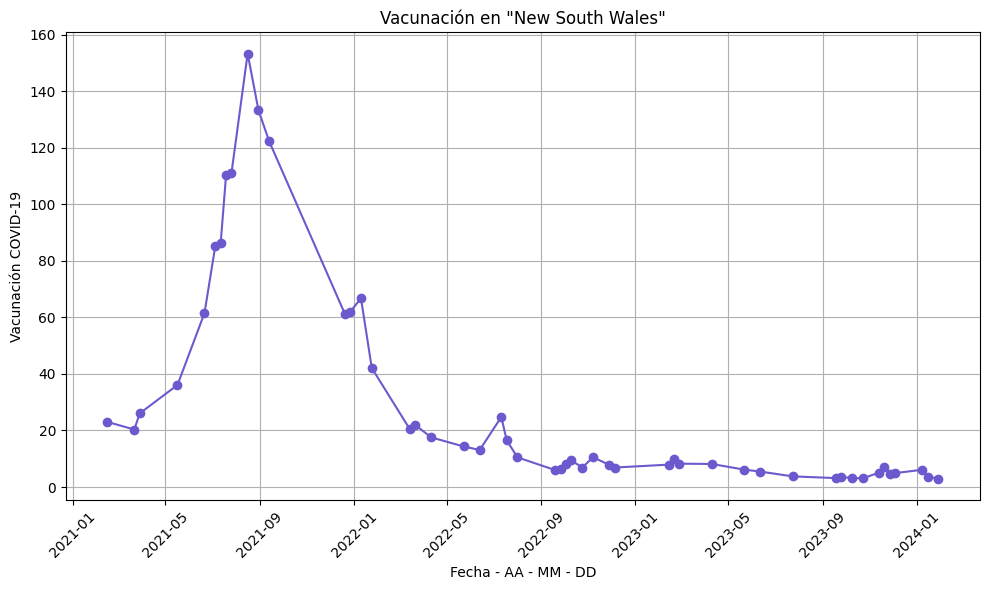

In [43]:
query = """
SELECT date,sub_region_1 ,sni_covid19_vaccination
FROM `bigquery-public-data.covid19_vaccination_search_insights.covid19_vaccination_search_insights`
WHERE sub_region_1 = 'New South Wales'
LIMIT 50
"""

query_job = client.query(query)


dfNW = query_job.to_dataframe()
dfNWO = dfNW.sort_values(by='date', ascending=True)

plt.figure(figsize=(10, 6))
plt.plot(dfNWO['date'], dfNWO['sni_covid19_vaccination'], marker='o', linestyle='-', color='slateblue')
plt.title('Vacunación en "New South Wales"')
plt.xlabel('Fecha - AA - MM - DD')
plt.ylabel('Vacunación COVID-19')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Establecer el límite en el eje x hasta '2022-07-11'
#plt.xlim(dfSAO['date'].min(), limite_fecha)

plt.show()





In [66]:
query = """
SELECT date, 
       SUM(sni_covid19_vaccination) AS VactotNW
FROM `bigquery-public-data.covid19_vaccination_search_insights.covid19_vaccination_search_insights` 
WHERE sub_region_1 = 'New South Wales' 
GROUP BY date 

"""

query_job = client.query(query)

result = query_job.result()

VacsNW = list(result)[0].VactotNW

print(VacsNW)

32205.287


# Queensland

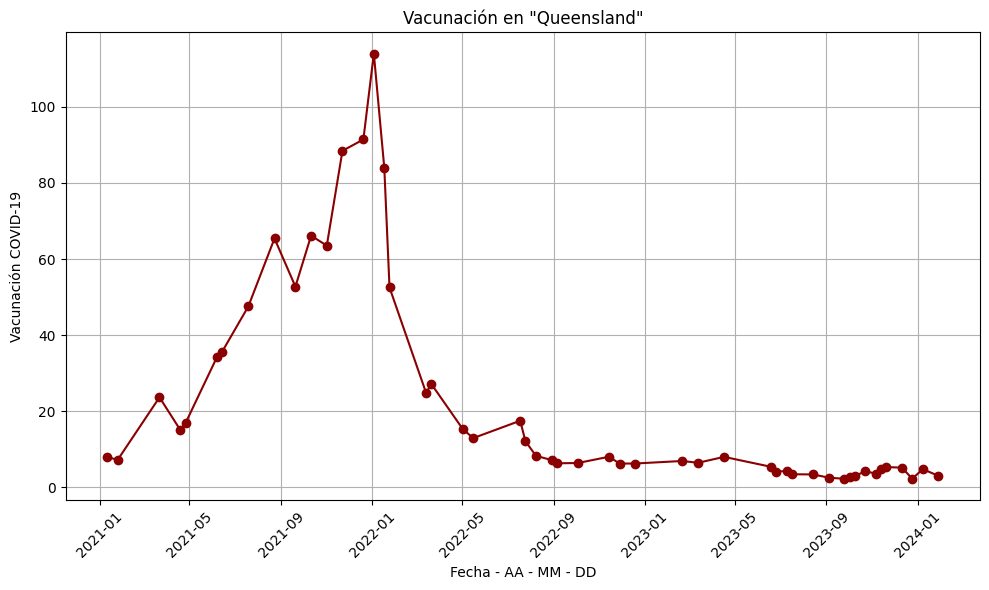

In [42]:
query = """
SELECT date,sub_region_1 ,sni_covid19_vaccination
FROM `bigquery-public-data.covid19_vaccination_search_insights.covid19_vaccination_search_insights`
WHERE sub_region_1 = 'Queensland'
LIMIT 50
"""

query_job = client.query(query)


dfQ = query_job.to_dataframe()
dfQO = dfQ.sort_values(by='date', ascending=True)

plt.figure(figsize=(10, 6))
plt.plot(dfQO['date'], dfQO['sni_covid19_vaccination'], marker='o', linestyle='-', color='darkred')
plt.title('Vacunación en "Queensland"')
plt.xlabel('Fecha - AA - MM - DD')
plt.ylabel('Vacunación COVID-19')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Establecer el límite en el eje x hasta '2022-07-11'
#plt.xlim(dfSAO['date'].min(), limite_fecha)

plt.show()

In [65]:
query = """
SELECT date, 
       SUM(sni_covid19_vaccination) AS VactotQ
FROM `bigquery-public-data.covid19_vaccination_search_insights.covid19_vaccination_search_insights` 
WHERE sub_region_1 = 'Queensland' 
GROUP BY date 

"""

query_job = client.query(query)

result = query_job.result()

VacsQ = list(result)[0].VactotQ

print(VacsQ)

4519.993999999997


# Victoria

In [37]:
query = """
SELECT date,sub_region_1 ,sni_covid19_vaccination
FROM `bigquery-public-data.covid19_vaccination_search_insights.covid19_vaccination_search_insights`
WHERE sub_region_1 = 'Victoria'
LIMIT 50
"""

query_job = client.query(query)


dfN = query_job.to_dataframe()
dfNO = dfN.sort_values(by='date', ascending=True)



In [38]:
dfN

,date,sub_region_1,sni_covid19_vaccination
0,2022-06-27,Victoria,9.608
1,2021-01-25,Victoria,7.340
2,2022-02-21,Victoria,23.627
3,2023-04-10,Victoria,7.150
4,2021-04-19,Victoria,14.658
5,2021-11-08,Victoria,77.086
6,2021-11-22,Victoria,61.642
7,2021-12-06,Victoria,43.492
8,2022-05-16,Victoria,11.897
9,2021-10-04,Victoria,154.788


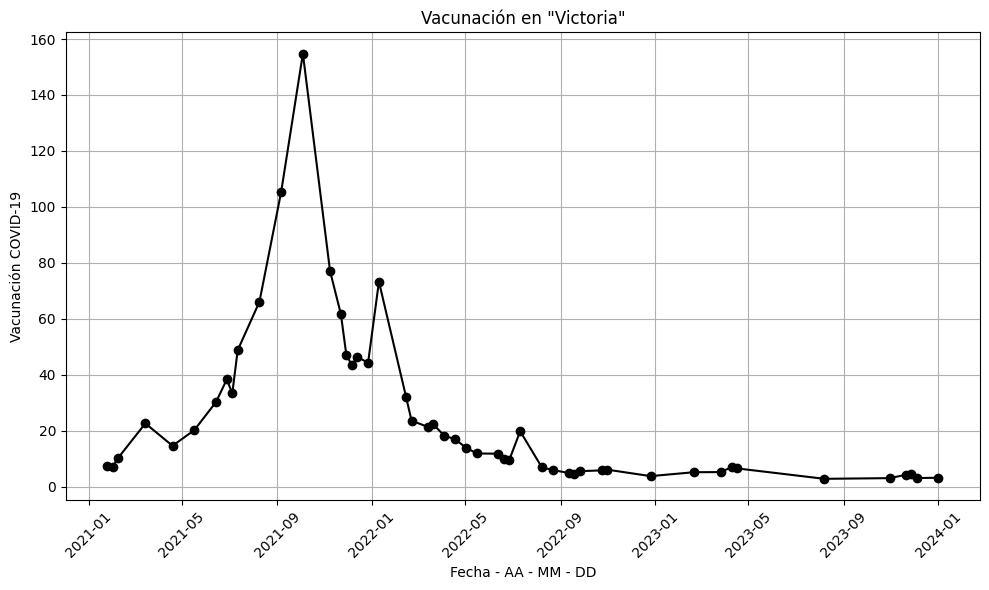

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(dfNO['date'], dfNO['sni_covid19_vaccination'], marker='o', linestyle='-', color='black')
plt.title('Vacunación en "Victoria"')
plt.xlabel('Fecha - AA - MM - DD')
plt.ylabel('Vacunación COVID-19')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()



plt.show()

In [73]:
query = """
SELECT date, 
       SUM(sni_covid19_vaccination) AS VactotV
FROM `bigquery-public-data.covid19_vaccination_search_insights.covid19_vaccination_search_insights` 
WHERE sub_region_1 = 'Victoria' 
GROUP BY date 

"""

query_job = client.query(query)

result = query_job.result()

VacsV = list(result)[0].VactotV

print(VacsV)

1342.4209999999994


# Comparacion cantidad de Vacunados

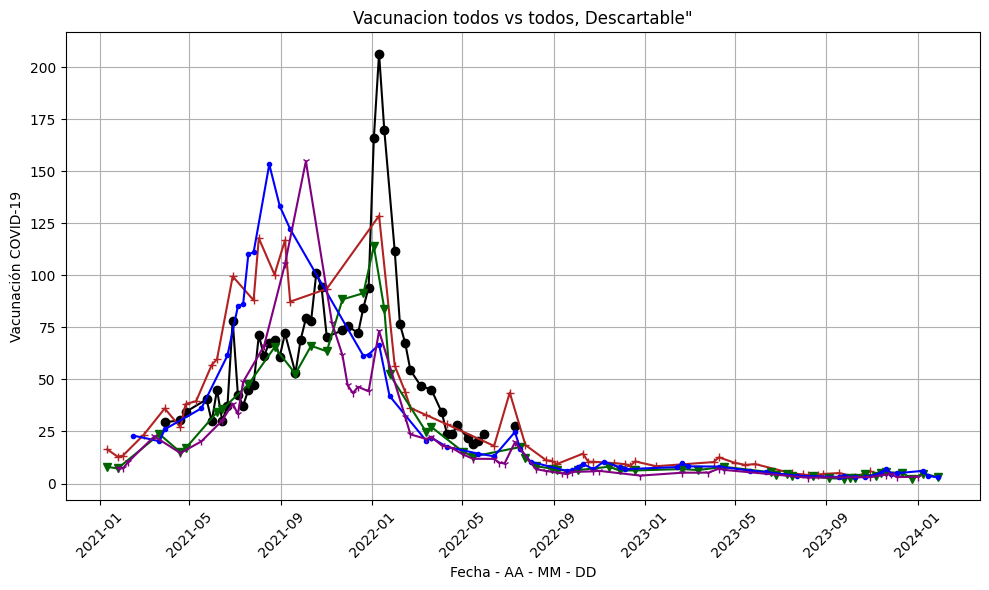

In [69]:
plt.figure(figsize=(10, 6))
plt.plot(dfWAO['date'], dfWAO['sni_covid19_vaccination'], marker='o', linestyle='-', color='black')
plt.plot(dfSAO['date'], dfSAO['sni_covid19_vaccination'], marker='+', linestyle='-', color='firebrick')
plt.plot(dfQO['date'], dfQO['sni_covid19_vaccination'], marker='v', linestyle='-', color='darkgreen')
plt.plot(dfNWO['date'], dfNWO['sni_covid19_vaccination'], marker='.', linestyle='-', color='blue')
plt.plot(dfNO['date'], dfNO['sni_covid19_vaccination'], marker='1', linestyle='-', color='purple')
plt.title('Vacunacion todos vs todos, Descartable"')
plt.xlabel('Fecha - AA - MM - DD')
plt.ylabel('Vacunación COVID-19')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
#Se aprecia horrible

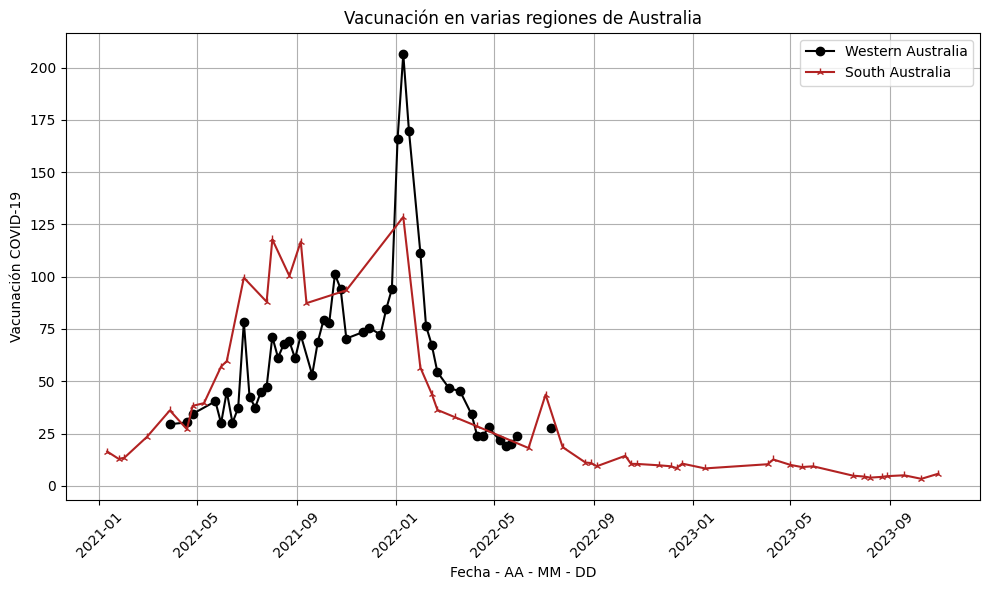

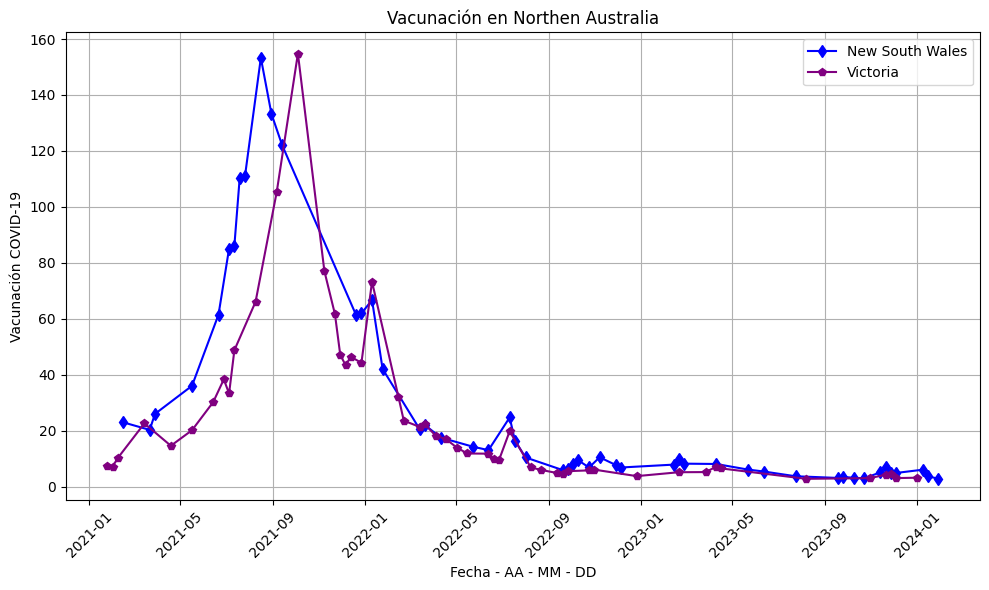

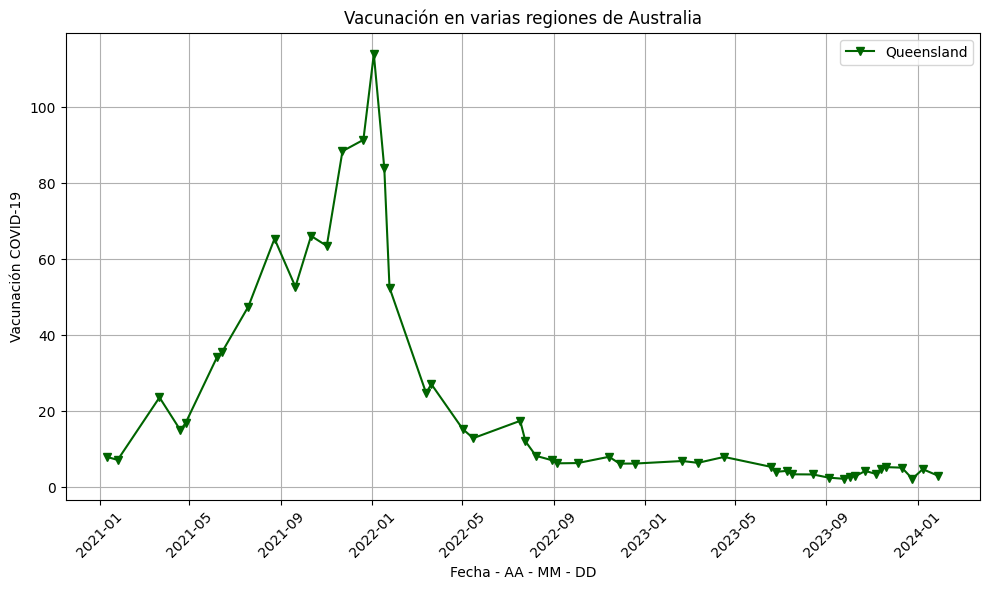

In [62]:
import matplotlib.pyplot as plt

# Definir rango de fechas para los ejes x
date_range = dfWAO['date']

# Crear figura y ejes para el primer gráfico con 3 conjuntos de datos
plt.figure(figsize=(10, 6))
plt.plot(dfWAO['date'], dfWAO['sni_covid19_vaccination'], marker='o', linestyle='-', color='black', label='Western Australia')
plt.plot(dfSAO['date'], dfSAO['sni_covid19_vaccination'], marker='2', linestyle='-', color='firebrick', label='South Australia')
plt.title('Vacunación en varias regiones de Australia')
plt.xlabel('Fecha - AA - MM - DD')
plt.ylabel('Vacunación COVID-19')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Crear figura y ejes para el segundo gráfico con 2 conjuntos de datos
plt.figure(figsize=(10, 6))
plt.plot(dfNWO['date'], dfNWO['sni_covid19_vaccination'], marker='d', linestyle='-', color='blue', label='New South Wales')
plt.plot(dfNO['date'], dfNO['sni_covid19_vaccination'], marker='p', linestyle='-', color='purple', label='Victoria')
plt.title('Vacunación en Northen Australia')
plt.xlabel('Fecha - AA - MM - DD')
plt.ylabel('Vacunación COVID-19')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.figure(figsize=(10, 6))
plt.plot(dfQO['date'], dfQO['sni_covid19_vaccination'], marker='v', linestyle='-', color='darkgreen', label='Queensland')
plt.title('Vacunación en varias regiones de Australia')
plt.xlabel('Fecha - AA - MM - DD')
plt.ylabel('Vacunación COVID-19')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()



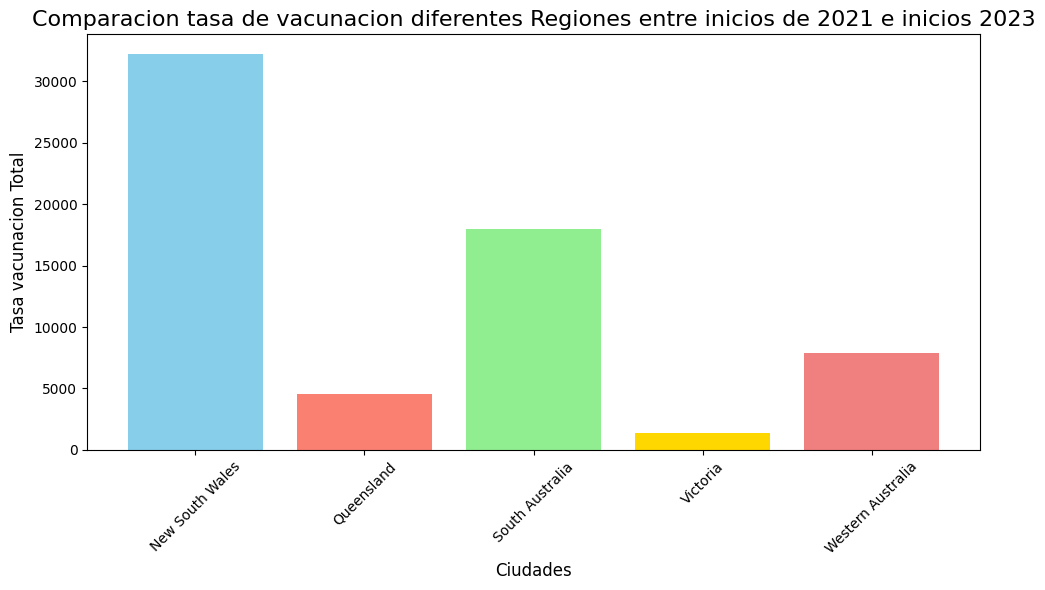

In [74]:
#importamos Numpy para realizar arreglos
import numpy as np


datos = [VacsNW , VacsQ , VacsSA , VacsV , VacsWA]
ciudades = ['New South Wales', 'Queensland', 'South Australia', 'Victoria', 'Western Australia']

indices = np.arange(len(datos))


plt.figure(figsize=(10, 6))
plt.bar(indices, datos, color=['skyblue', 'salmon', 'lightgreen', 'gold', 'lightcoral'])

plt.title('Comparacion tasa de vacunacion diferentes Regiones entre inicios de 2021 e inicios 2023', fontsize=16)
plt.xlabel('Ciudades', fontsize=12)
plt.ylabel('Tasa vacunacion Total', fontsize=12)
plt.xticks(indices, ciudades, rotation=45)

plt.tight_layout()


plt.show()


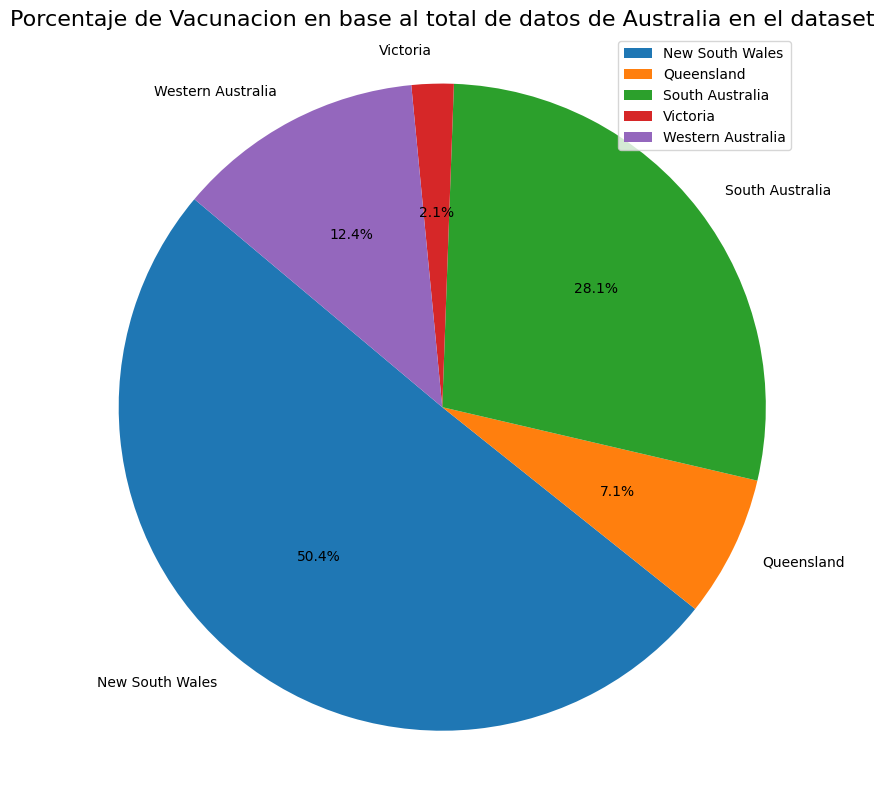

In [71]:


total = sum(datos)

porcentajes = [(valor / total) * 100 for valor in datos]


plt.figure(figsize=(8, 8))
plt.pie(porcentajes, labels=ciudades, autopct='%1.1f%%', startangle=140)


plt.title('Porcentaje de Vacunacion en base al total de datos de Australia en el dataset', fontsize=16)
plt.axis('equal')  # Hacer que el gráfico sea un círculo




plt.legend(loc='upper right', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


# Efetos Secundarios


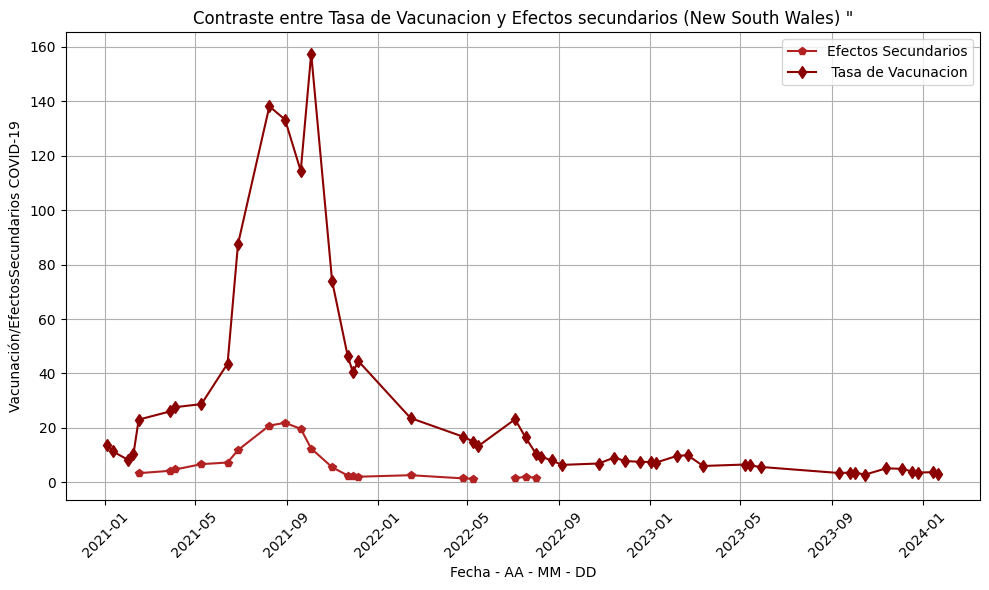

In [79]:

#Ahora realizamos un proceso similar a la tasa de vacunacion pero agregandole la columna de los efectos secundarios 
query = """
SELECT date,sub_region_1 ,sni_covid19_vaccination , sni_safety_side_effects
FROM `bigquery-public-data.covid19_vaccination_search_insights.covid19_vaccination_search_insights`
WHERE sub_region_1 = 'New South Wales'
LIMIT 50
"""



query_job = client.query(query)


dfNW = query_job.to_dataframe()
dfNWO = dfNW.sort_values(by='date', ascending=True)

plt.figure(figsize=(10, 6))
plt.plot(dfNWO['date'], dfNWO['sni_safety_side_effects'], marker='p', linestyle='-', color='firebrick' , label = "Efectos Secundarios")
plt.plot(dfNWO['date'], dfNWO['sni_covid19_vaccination'], marker='d', linestyle='-', color='darkred' ,label = " Tasa de Vacunacion")
plt.title('Contraste entre Tasa de Vacunacion y Efectos secundarios (New South Wales) "')
plt.xlabel('Fecha - AA - MM - DD')
plt.ylabel('Vacunación/EfectosSecundarios COVID-19')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()


#plt.xlim(dfSAO['date'].min(), limite_fecha)

plt.show()

In [49]:
correlation = dfNWO['sni_covid19_vaccination'].corr(dfNWO['sni_safety_side_effects'])

print("Correlación entre 'sni_covid19_vaccination' y 'sni_safety_side_effects':", correlation)

Correlación entre 'sni_covid19_vaccination' y 'sni_safety_side_effects': 0.8553934308331121


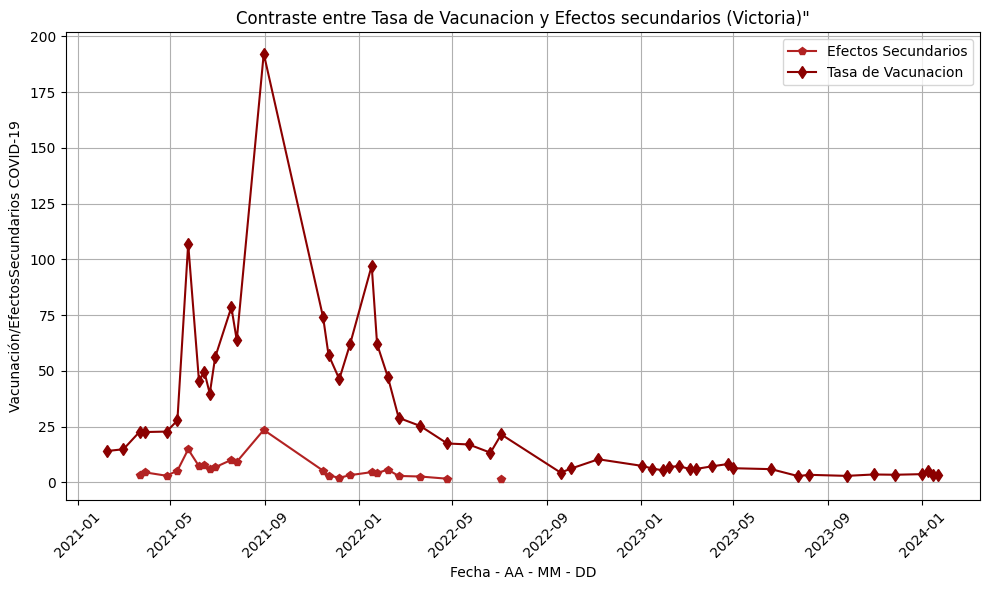

In [86]:
query = """
SELECT date,sub_region_1 ,sni_covid19_vaccination , sni_safety_side_effects
FROM `bigquery-public-data.covid19_vaccination_search_insights.covid19_vaccination_search_insights`
WHERE sub_region_1 = 'Victoria'
LIMIT 50
"""

query_job = client.query(query)


dfV = query_job.to_dataframe()
dfVO = dfV.sort_values(by='date', ascending=True)

plt.figure(figsize=(10, 6))
plt.plot(dfVO['date'], dfVO['sni_safety_side_effects'], marker='p', linestyle='-', color='firebrick' ,label = "Efectos Secundarios")
plt.plot(dfVO['date'], dfVO['sni_covid19_vaccination'], marker='d', linestyle='-', color='darkred', label = "Tasa de Vacunacion")
plt.title('Contraste entre Tasa de Vacunacion y Efectos secundarios (Victoria)"')
plt.xlabel('Fecha - AA - MM - DD')
plt.ylabel('Vacunación/EfectosSecundarios COVID-19')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Establecer el límite en el eje x hasta '2022-07-11'
#plt.xlim(dfSAO['date'].min(), limite_fecha)

plt.show()

In [62]:
correlation = dfVO['sni_covid19_vaccination'].corr(dfVO['sni_safety_side_effects'])

print("Correlación entre 'sni_covid19_vaccination' y 'sni_safety_side_effects':", correlation)

Correlación entre 'sni_covid19_vaccination' y 'sni_safety_side_effects': 0.776753060219402


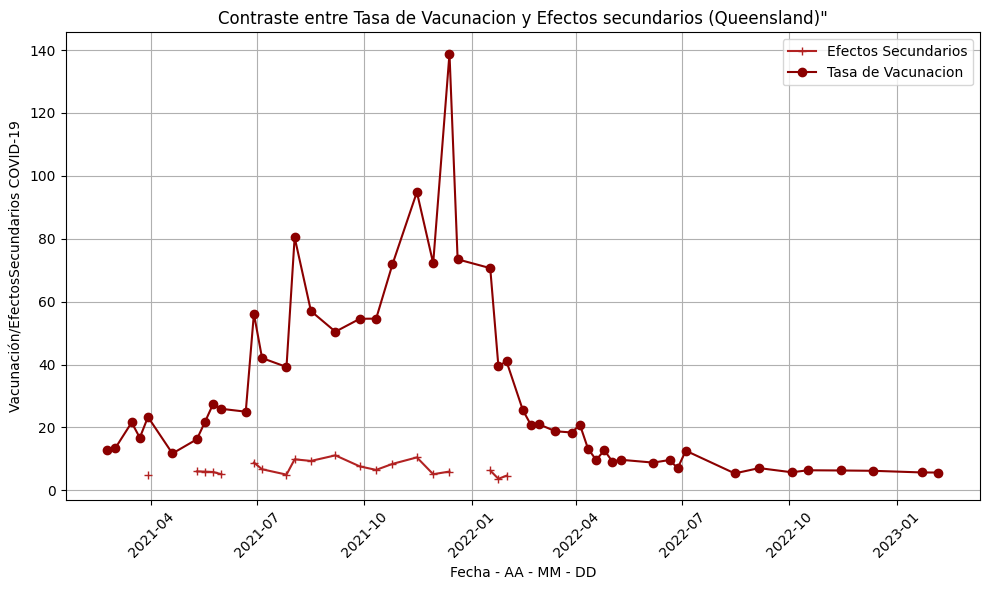

In [97]:
query = """
SELECT date,sub_region_1 ,sni_covid19_vaccination , sni_safety_side_effects
FROM `bigquery-public-data.covid19_vaccination_search_insights.covid19_vaccination_search_insights`
WHERE sub_region_1 = 'Queensland'
LIMIT 50
"""

query_job = client.query(query)


dfQ = query_job.to_dataframe()
dfQO = dfQ.sort_values(by='date', ascending=True)

plt.figure(figsize=(10, 6))
plt.plot(dfQO['date'], dfQO['sni_safety_side_effects'], marker='+', linestyle='-', color='firebrick' , label = "Efectos Secundarios")
plt.plot(dfQO['date'], dfQO['sni_covid19_vaccination'], marker='o', linestyle='-', color='darkred' , label = "Tasa de Vacunacion")
plt.title('Contraste entre Tasa de Vacunacion y Efectos secundarios (Queensland)"')
plt.xlabel('Fecha - AA - MM - DD')
plt.ylabel('Vacunación/EfectosSecundarios COVID-19')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()

# Establecer el límite en el eje x hasta '2022-07-11'
#plt.xlim(dfSAO['date'].min(), limite_fecha)

plt.show()

In [68]:
correlation = dfQO['sni_covid19_vaccination'].corr(dfQO['sni_safety_side_effects'])

print("Correlación entre 'sni_covid19_vaccination' y 'sni_safety_side_effects':", correlation)

Correlación entre 'sni_covid19_vaccination' y 'sni_safety_side_effects': 0.6844665631298553


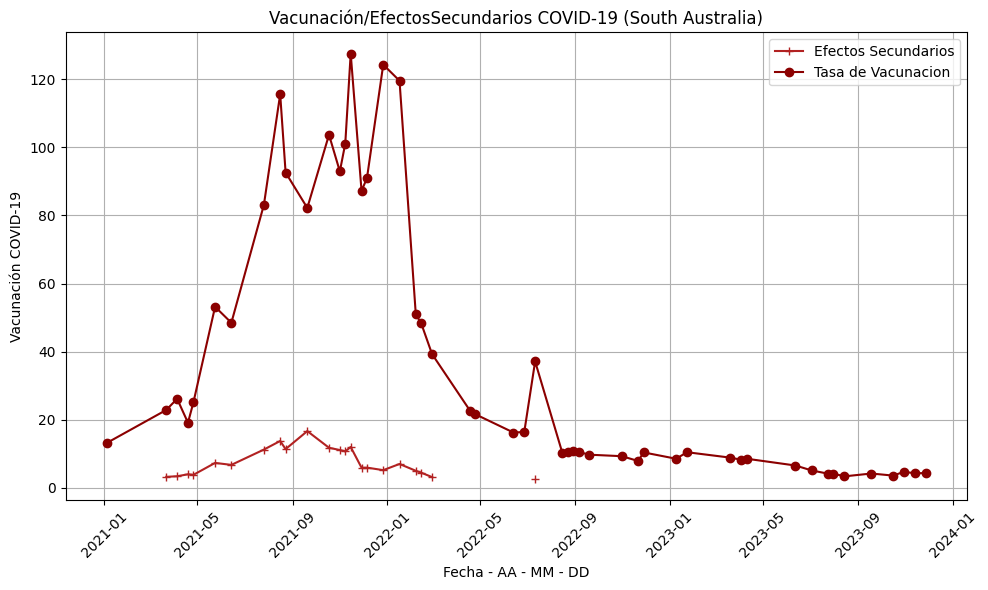

In [85]:
query = """
SELECT date,sub_region_1 ,sni_covid19_vaccination , sni_safety_side_effects
FROM `bigquery-public-data.covid19_vaccination_search_insights.covid19_vaccination_search_insights`
WHERE sub_region_1 = 'South Australia'
LIMIT 50
"""

query_job = client.query(query)


dfS = query_job.to_dataframe()
dfSO = dfS.sort_values(by='date', ascending=True)

plt.figure(figsize=(10, 6))
plt.plot(dfSO['date'], dfSO['sni_safety_side_effects'], marker='+', linestyle='-', color='firebrick' , label = "Efectos Secundarios")
plt.plot(dfSO['date'], dfSO['sni_covid19_vaccination'], marker='o', linestyle='-', color='darkred' , label = "Tasa de Vacunacion")
plt.title('Vacunación/EfectosSecundarios COVID-19 (South Australia)')
plt.xlabel('Fecha - AA - MM - DD')
plt.ylabel('Vacunación COVID-19')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Establecer el límite en el eje x hasta '2022-07-11'
#plt.xlim(dfSAO['date'].min(), limite_fecha)

plt.show()

In [72]:
correlation = dfSO['sni_covid19_vaccination'].corr(dfSO['sni_safety_side_effects'])

print("Correlación entre 'sni_covid19_vaccination' y 'sni_safety_side_effects':", correlation)

Correlación entre 'sni_covid19_vaccination' y 'sni_safety_side_effects': 0.90444655609338


# Comparacion Efectos Secundarios

In [88]:
#Por ultimo, obtemos la suma total de la cantidad de datos que hay en cada region de Australia 

query = """
SELECT date, 
       SUM(sni_safety_side_effects) AS TSSA
FROM `bigquery-public-data.covid19_vaccination_search_insights.covid19_vaccination_search_insights` 
WHERE sub_region_1 = 'South Australia' 
GROUP BY date 

"""

query_job = client.query(query)

result = query_job.result()

TSSAf = list(result)[0].TSSA

print(TSSAf)

698.3260000000002


In [89]:
query = """
SELECT date, 
       SUM(sni_safety_side_effects) AS TSSA
FROM `bigquery-public-data.covid19_vaccination_search_insights.covid19_vaccination_search_insights` 
WHERE sub_region_1 = 'Victoria' 
GROUP BY date 

"""

query_job = client.query(query)

result = query_job.result()

TVf = list(result)[0].TSSA

print(TVf)

32.294000000000004


In [90]:
query = """
SELECT date, 
       SUM(sni_safety_side_effects) AS A
FROM `bigquery-public-data.covid19_vaccination_search_insights.covid19_vaccination_search_insights` 
WHERE sub_region_1 = 'Queensland' 
GROUP BY date 

"""

query_job = client.query(query)

result = query_job.result()

TQf = list(result)[0].A

print(TQf)

667.236


In [91]:
query = """
SELECT date, 
       SUM(sni_safety_side_effects) AS A
FROM `bigquery-public-data.covid19_vaccination_search_insights.covid19_vaccination_search_insights` 
WHERE sub_region_1 = 'New South Wales' 
GROUP BY date 

"""

query_job = client.query(query)

result = query_job.result()

Twf = list(result)[0].A

print(Twf)

3316.0790000000015


In [92]:
#Sacamos lo porcentajes de personas con efecto Secundarios para cada ciudad 

PorV = (TVf/ VacsV) * 100
PorWA = (TQf/ VacsWA) * 100
PorNSW = (Twf / VacsNW) * 100
PorQ = (TSSAf / VacsSA) * 100


In [93]:
Li = [PorV , PorWA ,PorNSW, PorQ]
Li

[2.405653666025786, 8.445157282567912, 10.296691347603893, 3.8922594909517683]

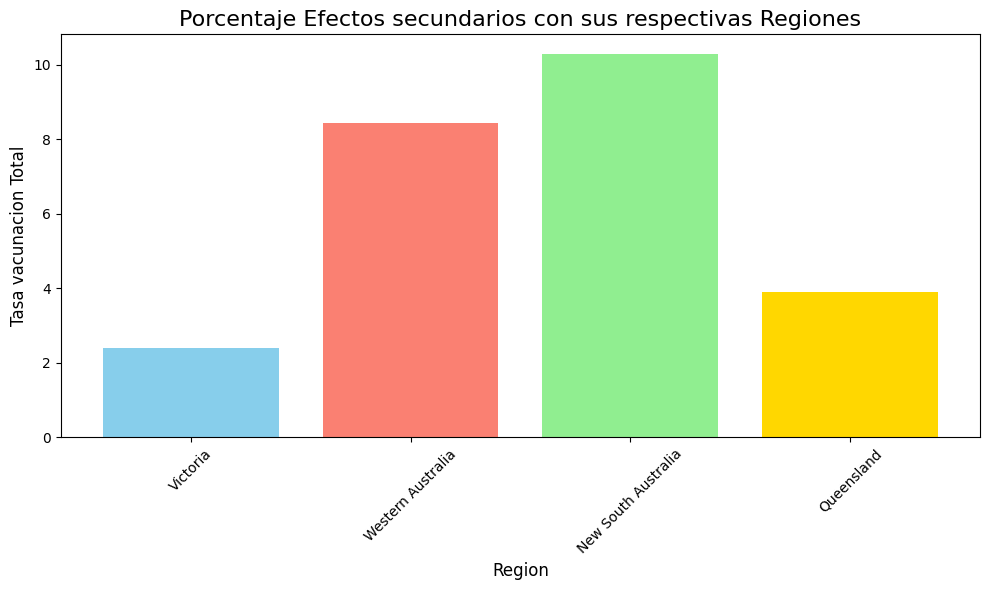

In [96]:

#Para luego sacar un porcentaje de la cantidad de personas con efectos secundarios en cada region

Li = [PorV, PorWA, PorNSW, PorQ]
city = ['Victoria', 'Western Australia', 'New South Australia', 'Queensland' ]

indices = np.arange(len(city))  

plt.figure(figsize=(10, 6))
plt.bar(indices, Li, color=['skyblue', 'salmon', 'lightgreen', 'gold', 'lightcoral'])

plt.title('Porcentaje Efectos secundarios con sus respectivas Regiones', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Tasa vacunacion Total', fontsize=12)
plt.xticks(indices, city, rotation=45)  # Use `city` instead of `ciudades`

plt.tight_layout()
plt.show()
